# NEURAL NETWORKS : TENSORFLOW

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2794 - accuracy: 0.9212
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1273 - accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0883 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0668 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 2s 893us/step - loss: 0.0532 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 2s 805us/step - loss: 0.0418 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 2s 851us/step - loss: 0.0342 - accuracy: 0.99000s
Epoch 8/10
1875/1875 [==============================] - 2s 870us/step - loss: 0.0275 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 2s 859us/step - loss: 0.0235 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 2s 858us/step

In [5]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 766us/step - loss: 0.0763 - accuracy: 0.9774


[0.07626815140247345, 0.977400004863739]

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

tensorBoard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam",histogram_freq=1)
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['accuracy'])

model.fit(x_train,y_train,epochs = 5,callbacks=[tensorBoard_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 961us/step - loss: 20.2948 - accuracy: 0.1289
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.2774 - accuracy: 0.1081
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.2774 - accuracy: 0.1025
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.2774 - accuracy: 0.1007
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.2774 - accuracy: 0.0996


In [7]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 804us/step - loss: 20.2422 - accuracy: 0.0992


[20.24220085144043, 0.09920000284910202]

In [8]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# CHURN MODELLING 

In [9]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
df = pd.read_csv(r"/Machine Learning/Churn Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df.drop('RowNumber',axis='columns',inplace=True)
df.drop('CustomerId',axis='columns',inplace=True)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
for column in df:
    print(f'{column} : {df[column].unique()}')

Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 56

In [14]:
df.replace({'Female':0,'Male':1},inplace=True)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [15]:
df.replace({'France':0, 'Spain':1, 'Germany':2},inplace=True)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [16]:
# Dropped column 'Surname'
df.drop('Surname',axis='columns',inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [17]:
columns_toScale = ['Age','Balance','EstimatedSalary']
df[columns_toScale] = scaler.fit_transform(df[columns_toScale])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,0.324324,2,0.000000,1,1,1,0.506735,1
1,608,1,0,0.310811,1,0.334031,1,0,1,0.562709,0
2,502,0,0,0.324324,8,0.636357,3,1,0,0.569654,1
3,699,0,0,0.283784,1,0.000000,2,0,0,0.469120,0
4,850,1,0,0.337838,2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,0.283784,5,0.000000,2,1,0,0.481341,0
9996,516,0,1,0.229730,10,0.228657,1,1,1,0.508490,0
9997,709,0,0,0.243243,7,0.000000,1,0,1,0.210390,1
9998,772,2,1,0.324324,3,0.299226,2,1,0,0.464429,1


In [18]:
x = df.drop('Exited',axis='columns')
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [19]:
x_train.shape

(8000, 10)

In [20]:
x_test.shape

(2000, 10)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'), # Input Layer 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='relu'), # Hidden Layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid') # Ouput Layer
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 691us/step - loss: 11.1849 - accuracy: 0.6202
Epoch 2/10
250/250 [==============================] - 0s 717us/step - loss: 2.3027 - accuracy: 0.6706
Epoch 3/10
250/250 [==============================] - 0s 745us/step - loss: 0.7295 - accuracy: 0.7599
Epoch 4/10
250/250 [==============================] - 0s 727us/step - loss: 0.5520 - accuracy: 0.7946
Epoch 5/10
250/250 [==============================] - 0s 749us/step - loss: 0.5318 - accuracy: 0.7960
Epoch 6/10
250/250 [==============================] - 0s 784us/step - loss: 0.5247 - accuracy: 0.7960
Epoch 7/10
250/250 [==============================] - ETA: 0s - loss: 0.5158 - accuracy: 0.79 - 0s 737us/step - loss: 0.5198 - accuracy: 0.7960
Epoch 8/10
250/250 [==============================] - 0s 774us/step - loss: 0.5166 - accuracy: 0.7960
Epoch 9/10
250/250 [==============================] - 0s 735us/step - loss: 0.5123 - accuracy: 0.7960
Epoch 10/10
250/250 [==================

In [22]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 690us/step - loss: 0.5065 - accuracy: 0.7975


[0.5065051913261414, 0.7975000143051147]

In [23]:
y_pred = model.predict(x_test)
y_pred

array([[0.22497228],
       [0.24378717],
       [0.22808811],
       ...,
       [0.22475284],
       [0.24151209],
       [0.2303316 ]], dtype=float32)

Text(69.0, 0.5, 'TRUTH')

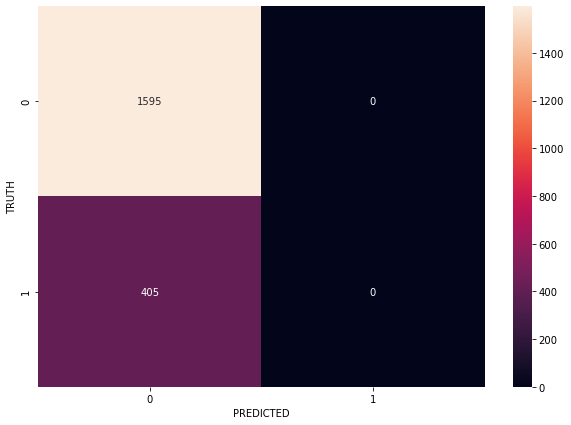

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')

# CONVOLUTIONAL NEURAL NETWORK (CNN)

In [25]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

In [26]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [27]:
x_train.shape ,len(x_train)

((60000, 28, 28), 60000)

In [28]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train = x_train/255
x_test = x_test/255

In [29]:
model = keras.Sequential([
    keras.layers.Conv2D(50, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(50, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [30]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1290 - accuracy: 0.9603
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0407 - accuracy: 0.9871
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0285 - accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0211 - accuracy: 0.9935
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0157 - accuracy: 0.9954


In [31]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0328 - accuracy: 0.9902


[0.03284187987446785, 0.9901999831199646]

In [32]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

